基础实验

In [21]:
import gym
import matplotlib.pyplot as plt
import IPython.display as display
import numpy as np
import pygame                                                                                                                
import time

In [126]:
#主要函数体和类的编写
class QLearningAgent():
    def __init__(self, obs_n, act_n, lr, gamma, e_greed):
        self.act_n = act_n      # 动作数
        self.lr = lr # 学习率
        self.gamma = gamma # 奖励衰减
        self.epsilon = e_greed  # 贪心率
        self.Q = np.zeros((obs_n, act_n)) # 存放Q值
    
    # 根据输入观察值根据贪心策略输出动作
    def sample(self, obs):
        if np.random.uniform() < self.epsilon:
            action = np.random.choice( self.act_n)
        else:
            action = np.argmax(self.Q[obs])
        return action
    
    #根据观测值输出当前Q表下对应的最优动作
    def predict(self, obs):
        action = np.argmax(self.Q[obs])
        return action
    
    # Q表更新学习
    def learn(self, obs, action, reward, next_obs, next_action, done):
        q_predict = self.Q[obs][action]
        if done:
            q_target = reward
        else:
            q_target = reward + self.gamma * np.max(self.Q[next_obs])
        self.Q[obs][action] += self.lr * (q_target - q_predict)


# #仿照QlearningAgent完成SarsaAgent的编写
class SarsaAgent():
    def __init__(self, obs_n, act_n, lr, gamma, epsilon):
        self.obs_n = obs_n
        self.act_n = act_n
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((obs_n, act_n))  # 存放Q值

    def sample(self, obs):
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.act_n)
        else:
            action = np.argmax(self.Q[obs])
        return action
    
    #根据观测值输出当前Q表下对应的最优动作
    def predict(self, obs):
        action = np.argmax(self.Q[obs])
        return action

    def learn(self, obs, action, reward, next_obs, next_action, done):
        q_predict = self.Q[obs][action]
        if done:
            q_target = reward
        else:
            q_target = reward + self.gamma * self.Q[next_obs][next_action]
        self.Q[obs][action] += self.lr * (q_target - q_predict)


#训练函数
def train_episode(env, agent, obs):
    done = False
    total_reward = 0
    while True:       
        action = agent.sample(obs)
        next_obs, reward, done, _, _ = env.step(action)
        next_action = agent.sample(next_obs)
        agent.learn(obs, action, reward, next_obs, next_action, done)
        total_reward += reward
        if done:
            break
        obs = next_obs
        action = next_action
    return total_reward

#测试函数
def test_episode(env, agent, obs):

    done = False
    total_reward = 0
    while not done:
        action = agent.predict(obs)
        next_obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        obs = next_obs
    return total_reward

g:\myenvs\moon\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


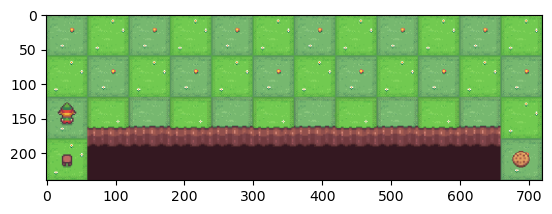

In [26]:
# 创建环境
env = gym.make('CliffWalking-v0',render_mode='rgb_array')
env.reset()
obs_n = env.observation_space.n
act_n = env.action_space.n
#以向上走为例
obs, reward, done, _, _ = env.step(0)
#可视化
plt.imshow(env.render())
#关闭环境
env.close()

In [27]:
obs

24

In [56]:
# 创建QLearningAgent对象和SarsaAgent对象
ql_agent = QLearningAgent(obs_n, act_n, lr=0.1, gamma=0.9, e_greed=0.1)
sarsa_agent = SarsaAgent(obs_n, act_n, lr=0.1, gamma=0.9, epsilon=0.1)


In [95]:

def show_optimal_path(agent, obs, action_list, reward_list, total_reward_list, temp_total_reward, img):
    while True:
        action = agent.sample(obs)
        next_obs, reward, done, _, _ = env.step(action)
        next_action = agent.sample(next_obs)
        agent.learn(obs, action, reward, next_obs, next_action, done)
        temp_total_reward += reward
        action_list.append(action)
        total_reward_list.append(temp_total_reward)
        reward_list.append(reward)
        obs = next_obs
        action = next_action
        time.sleep(0.2)    #每帧动画定格0.2s
        data=env.render()
        img.set_data(data) # 刷新图片
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        if done:
            break
        
        
def print_path(action_list, reward_list, total_reward_list, action_dic):
    #路径的信息显示
    print("规划路径为:")
    for i in range(len(action_list)):
        print(f"第{i+1}步的动作为{action_dic[action_list[i]]}，奖励为{reward_list[i]}, 积累总奖励为{total_reward_list[i]}")
    print(f"最终总奖励为{total_reward_list[i]}")



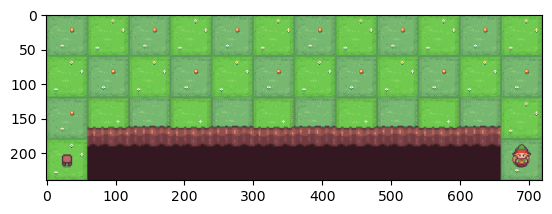

In [63]:
# 使用动画演示代码展示最优路径
env = gym.make("CliffWalking-v0",render_mode='rgb_array')
env.reset()
img=plt.imshow(env.render())

total_reward_list = []
action_list = []
action_dic = {0:"向上走", 1:"向右走", 2:"向下走", 3:"向左走"}
reward_list = []
temp_total_reward = 0
show_optimal_path(ql_agent, obs, action_list, reward_list, total_reward_list, temp_total_reward, img)

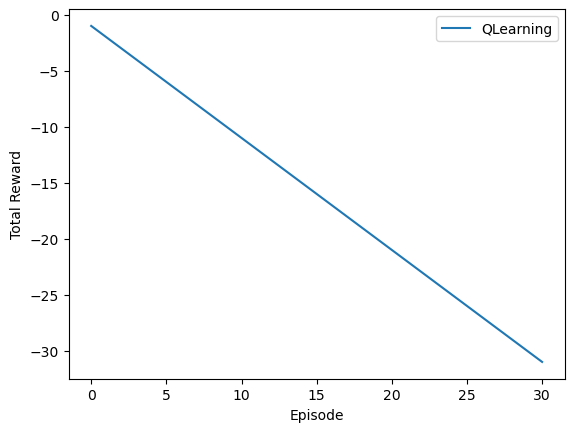

In [64]:
plt.plot(total_reward_list, label='QLearning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

In [65]:
print_path(action_list, reward_list, total_reward_list, action_dic)

Not finished!
规划路径为:
第1步的动作为向左走，奖励为-1, 积累总奖励为-1
第2步的动作为向下走，奖励为-1, 积累总奖励为-2
第3步的动作为向左走，奖励为-1, 积累总奖励为-3
第4步的动作为向上走，奖励为-1, 积累总奖励为-4
第5步的动作为向上走，奖励为-1, 积累总奖励为-5
第6步的动作为向右走，奖励为-1, 积累总奖励为-6
第7步的动作为向右走，奖励为-1, 积累总奖励为-7
第8步的动作为向右走，奖励为-1, 积累总奖励为-8
第9步的动作为向右走，奖励为-1, 积累总奖励为-9
第10步的动作为向右走，奖励为-1, 积累总奖励为-10
第11步的动作为向上走，奖励为-1, 积累总奖励为-11
第12步的动作为向右走，奖励为-1, 积累总奖励为-12
第13步的动作为向上走，奖励为-1, 积累总奖励为-13
第14步的动作为向左走，奖励为-1, 积累总奖励为-14
第15步的动作为向下走，奖励为-1, 积累总奖励为-15
第16步的动作为向右走，奖励为-1, 积累总奖励为-16
第17步的动作为向上走，奖励为-1, 积累总奖励为-17
第18步的动作为向右走，奖励为-1, 积累总奖励为-18
第19步的动作为向上走，奖励为-1, 积累总奖励为-19
第20步的动作为向下走，奖励为-1, 积累总奖励为-20
第21步的动作为向上走，奖励为-1, 积累总奖励为-21
第22步的动作为向左走，奖励为-1, 积累总奖励为-22
第23步的动作为向下走，奖励为-1, 积累总奖励为-23
第24步的动作为向右走，奖励为-1, 积累总奖励为-24
第25步的动作为向右走，奖励为-1, 积累总奖励为-25
第26步的动作为向下走，奖励为-1, 积累总奖励为-26
第27步的动作为向右走，奖励为-1, 积累总奖励为-27
第28步的动作为向右走，奖励为-1, 积累总奖励为-28
第29步的动作为向右走，奖励为-1, 积累总奖励为-29
第30步的动作为向右走，奖励为-1, 积累总奖励为-30
第31步的动作为向下走，奖励为-1, 积累总奖励为-31
最终总奖励为-31


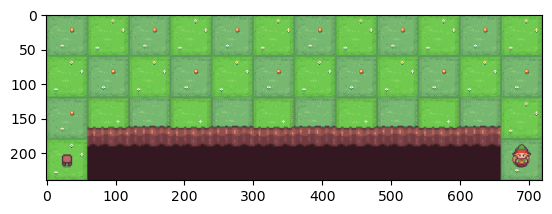

In [96]:
# 使用动画演示代码展示最优路径
env = gym.make("CliffWalking-v0",render_mode='rgb_array')
env.reset()
img=plt.imshow(env.render())

total_reward_list = []
action_list = []
action_dic = {0:"向上走", 1:"向右走", 2:"向下走", 3:"向左走"}
reward_list = []
temp_total_reward = 0
show_optimal_path(sarsa_agent, obs, action_list, reward_list, total_reward_list, temp_total_reward, img)

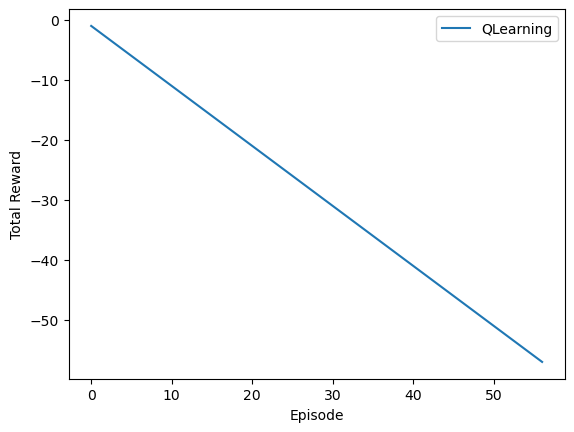

In [67]:
plt.plot(total_reward_list, label='QLearning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

In [68]:
print_path(action_list, reward_list, total_reward_list, action_dic)

Not finished!
规划路径为:
第1步的动作为向上走，奖励为-1, 积累总奖励为-1
第2步的动作为向右走，奖励为-1, 积累总奖励为-2
第3步的动作为向上走，奖励为-1, 积累总奖励为-3
第4步的动作为向上走，奖励为-1, 积累总奖励为-4
第5步的动作为向上走，奖励为-1, 积累总奖励为-5
第6步的动作为向右走，奖励为-1, 积累总奖励为-6
第7步的动作为向上走，奖励为-1, 积累总奖励为-7
第8步的动作为向右走，奖励为-1, 积累总奖励为-8
第9步的动作为向上走，奖励为-1, 积累总奖励为-9
第10步的动作为向右走，奖励为-1, 积累总奖励为-10
第11步的动作为向上走，奖励为-1, 积累总奖励为-11
第12步的动作为向右走，奖励为-1, 积累总奖励为-12
第13步的动作为向上走，奖励为-1, 积累总奖励为-13
第14步的动作为向右走，奖励为-1, 积累总奖励为-14
第15步的动作为向上走，奖励为-1, 积累总奖励为-15
第16步的动作为向右走，奖励为-1, 积累总奖励为-16
第17步的动作为向下走，奖励为-1, 积累总奖励为-17
第18步的动作为向下走，奖励为-1, 积累总奖励为-18
第19步的动作为向上走，奖励为-1, 积累总奖励为-19
第20步的动作为向右走，奖励为-1, 积累总奖励为-20
第21步的动作为向上走，奖励为-1, 积累总奖励为-21
第22步的动作为向上走，奖励为-1, 积累总奖励为-22
第23步的动作为向右走，奖励为-1, 积累总奖励为-23
第24步的动作为向上走，奖励为-1, 积累总奖励为-24
第25步的动作为向右走，奖励为-1, 积累总奖励为-25
第26步的动作为向上走，奖励为-1, 积累总奖励为-26
第27步的动作为向右走，奖励为-1, 积累总奖励为-27
第28步的动作为向上走，奖励为-1, 积累总奖励为-28
第29步的动作为向右走，奖励为-1, 积累总奖励为-29
第30步的动作为向下走，奖励为-1, 积累总奖励为-30
第31步的动作为向上走，奖励为-1, 积累总奖励为-31
第32步的动作为向下走，奖励为-1, 积累总奖励为-32
第33步的动作为向右走，奖励为-1, 积累总奖励为-33
第34步的动作为向下走，奖励为-1, 积累总奖励为-34
第35步的动作为向上走

In [136]:
# 综合分析不同贪心值的探究实验
greedy_values = [0.1, 0.3, 0.5, 0.7, 0.9]
for greedy_value in greedy_values:
    agent = QLearningAgent(obs_n, act_n, lr=0.1, gamma=0.9, e_greed=greedy_value)
    _total_reward = train_episode(env, agent, obs)
    print("greedy value:",greedy_value,"    reward:",_total_reward)
    

greedy value: 0.1     reward: -10
greedy value: 0.3     reward: -28
greedy value: 0.5     reward: -25
greedy value: 0.7     reward: -2778
greedy value: 0.9     reward: -33718


拓展实验要求（非必选）
了解深度强化学习的基本方法，例如DQN、DDPG、A3C、PPO、TRPO等，运行一个或多个实例。(如果动画渲染在jupyter中难以进行，可考虑选择一些不需要动画演示的问题，如组合优化问题等)